__The challenge objective__: tell a data story about a subset of the data science community represented in this survey, through a combination of both narrative text and data exploration. A “story” could be defined any number of ways, and that’s deliberate. The challenge is to deeply explore (through data) the impact, priorities, or concerns of a specific group of data science and machine learning practitioners. That group can be defined in the macro (for example: anyone who does most of their coding in Python) or the micro (for example: female data science students studying machine learning in masters programs). This is an opportunity to be creative and tell the story of a community you identify with or are passionate about!

Check Out the Kaggle page for this contest: https://www.kaggle.com/kaggle/kaggle-survey-2018/home?utm_medium=email&utm_source=intercom&utm_campaign=dsml-survey2018


### Fig1. 

Observe the distribution of participants, plot the number of participants from different countries. Also to see which countries have the youngest developers, plot the participant in age range of [18-21],[22-24],[25-29] and show all the four bars for each country. 

In [1]:
# Your solution goes here

# Reading the data ...
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

survey=pd.read_csv("multipleChoiceResponses.csv",header=1,low_memory=False)

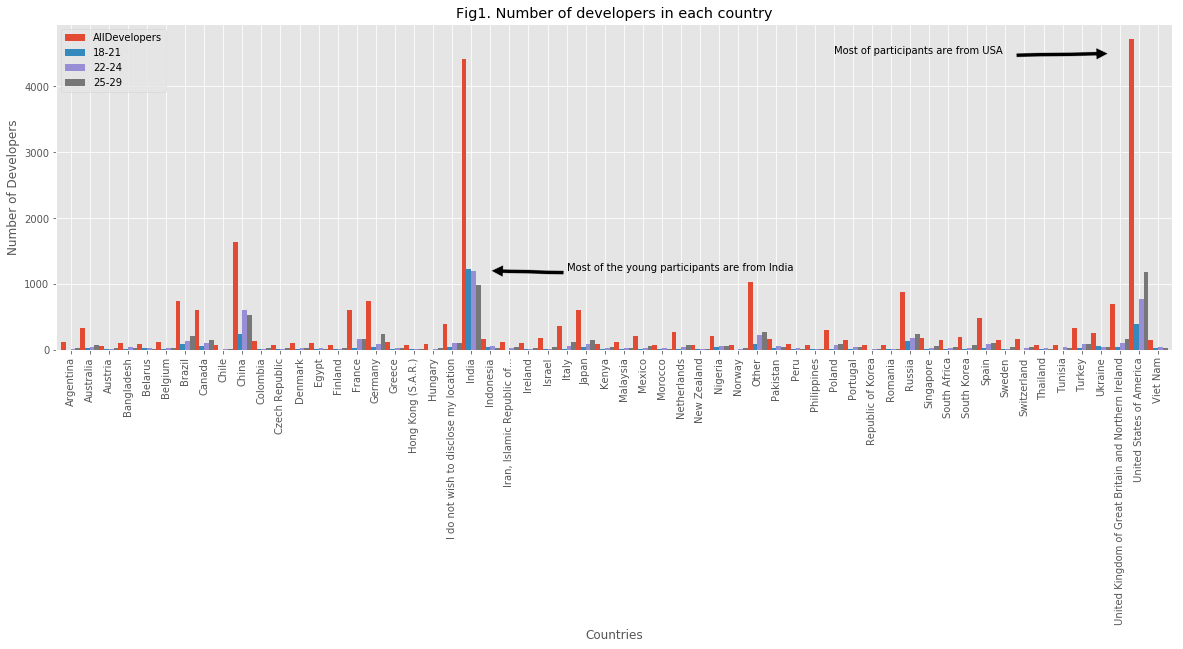

In [2]:
plt.style.use('ggplot')

allDevelopers=survey.groupby(by="In which country do you currently reside?").size()
Vis0=allDevelopers
HeaderNames=["AllDevelopers"]
for ageRange in ["18-21","22-24","25-29"]:
    newGroupDevelopers=survey.loc[survey["What is your age (# years)?"] == ageRange].groupby(by="In which country do you currently reside?").size()
    Vis0 = pd.concat([Vis0, newGroupDevelopers], axis=1)
    HeaderNames.append(ageRange)

Vis0.columns = HeaderNames
ax = Vis0.plot(kind='bar',figsize=(20, 6),width=1,title="Fig1. Number of developers in each country")

ax.set_ylabel("Number of Developers")
ax.set_xlabel("Countries")
ax.annotate('Most of the young participants are from India', xy=(22, 1200), xytext=(26, 1200),
            arrowprops=dict(facecolor='black', shrink=0.01));
ax.annotate('Most of participants are from USA', xy=(55, 4500), xytext=(40, 4500),
            arrowprops=dict(facecolor='black', shrink=0.1));


### Fig2.

To study the corelation between experience and income of people. In the following scatter plot the circles show each group of people and the size of the circle shows the number of participants in that group. 

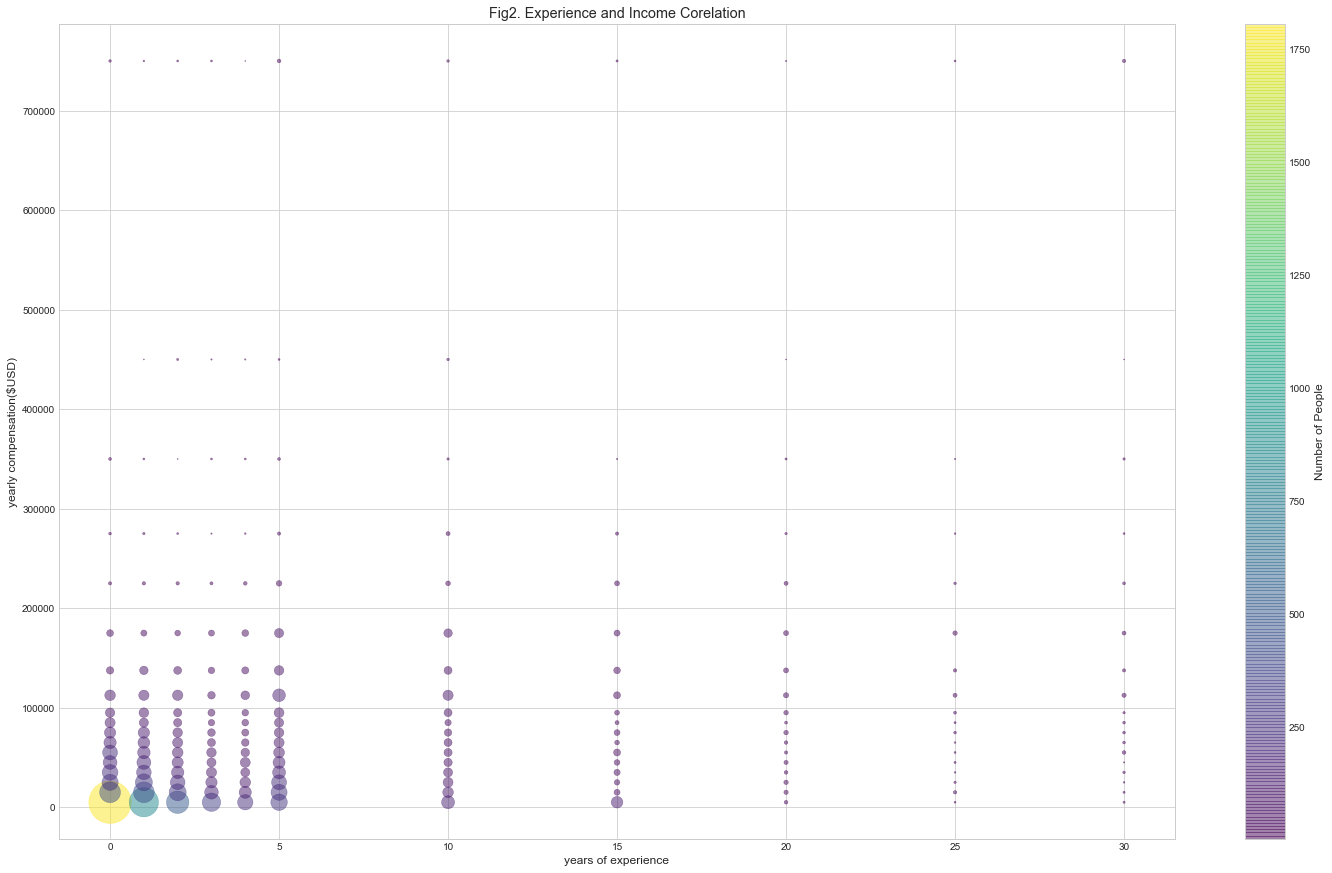

In [24]:
import numpy as np
plt.style.use('seaborn-whitegrid')
#parse-salaries
def parse_salary(df,feature):
    notentered = 'I do not wish to disclose my approximate yearly compensation'
    salaries = df[feature].replace(to_replace=notentered, value=np.nan).dropna()[1:]
    salaries = salaries.apply(lambda val: [int(x) for x in val.replace("-","000-").replace(",","").replace("+","-1000000").split("-")])
    salaries = pd.DataFrame(salaries.tolist(), columns=['income-min','income-max'],index=salaries.index)
    return (salaries["income-min"]+salaries["income-max"])/2

salaries = parse_salary(survey,"What is your current yearly compensation (approximate $USD)?")
survey2=pd.concat([survey,salaries], axis=1)
survey2.columns=np.append(survey2.columns.values[:-1],np.array("avg_income"))


Vis2=survey2.groupby(by=["How many years of experience do you have in your current role?","avg_income"]).size().reset_index()
Vis2.columns=["years of experience","yearly compensation($USD)","Number of People"]

newCol=[]
for indx,each in Vis2["years of experience"].iteritems():
    if '+' in each:
        each=each.replace('+','-')
    
    newCol.append(int(each.split('-')[0]))
newDF=pd.DataFrame(newCol, columns=['int_experience'])    
Vis2=pd.concat([Vis2,newDF], axis=1)
Vis2.sort_values(by=["int_experience"])


rng = np.random.RandomState(0)
x = np.array(Vis2["int_experience"])
y = np.array(Vis2["yearly compensation($USD)"])
sizes = np.array(Vis2["Number of People"])
colors = sizes

plt.figure(figsize=(25,15))
plt.scatter(x, y, c=colors, s=sizes, alpha=0.5,
            cmap='viridis')
plt.xlabel("years of experience")
plt.ylabel("yearly compensation($USD)");

plt.title("Fig2. Experience and Income Corelation")
plt.colorbar(label='Number of People'); 

### Fig3.

The first chart shows the undergraduate major of the participants.

In the second pie chart we want to see how many users use AWS, GCP and Azure among all other cloud computing services. 


In [35]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
Vis3=survey.groupby(by=["Which best describes your undergraduate major? - Selected Choice"]).size().reset_index()
Vis3.columns=['major','Number of People']

cols = [column for column in survey if "the following cloud computing services have you used at work" in column]
df=survey[cols]
df['cloud computing services'] = df.iloc[:,[0,1,2,-3]].apply(lambda x: ','.join(x.dropna().astype(str).astype(str)),axis=1)
Vis4=df.groupby(by="cloud computing services").size().reset_index()
Vis4.columns=['cloud computing services','Number of People']

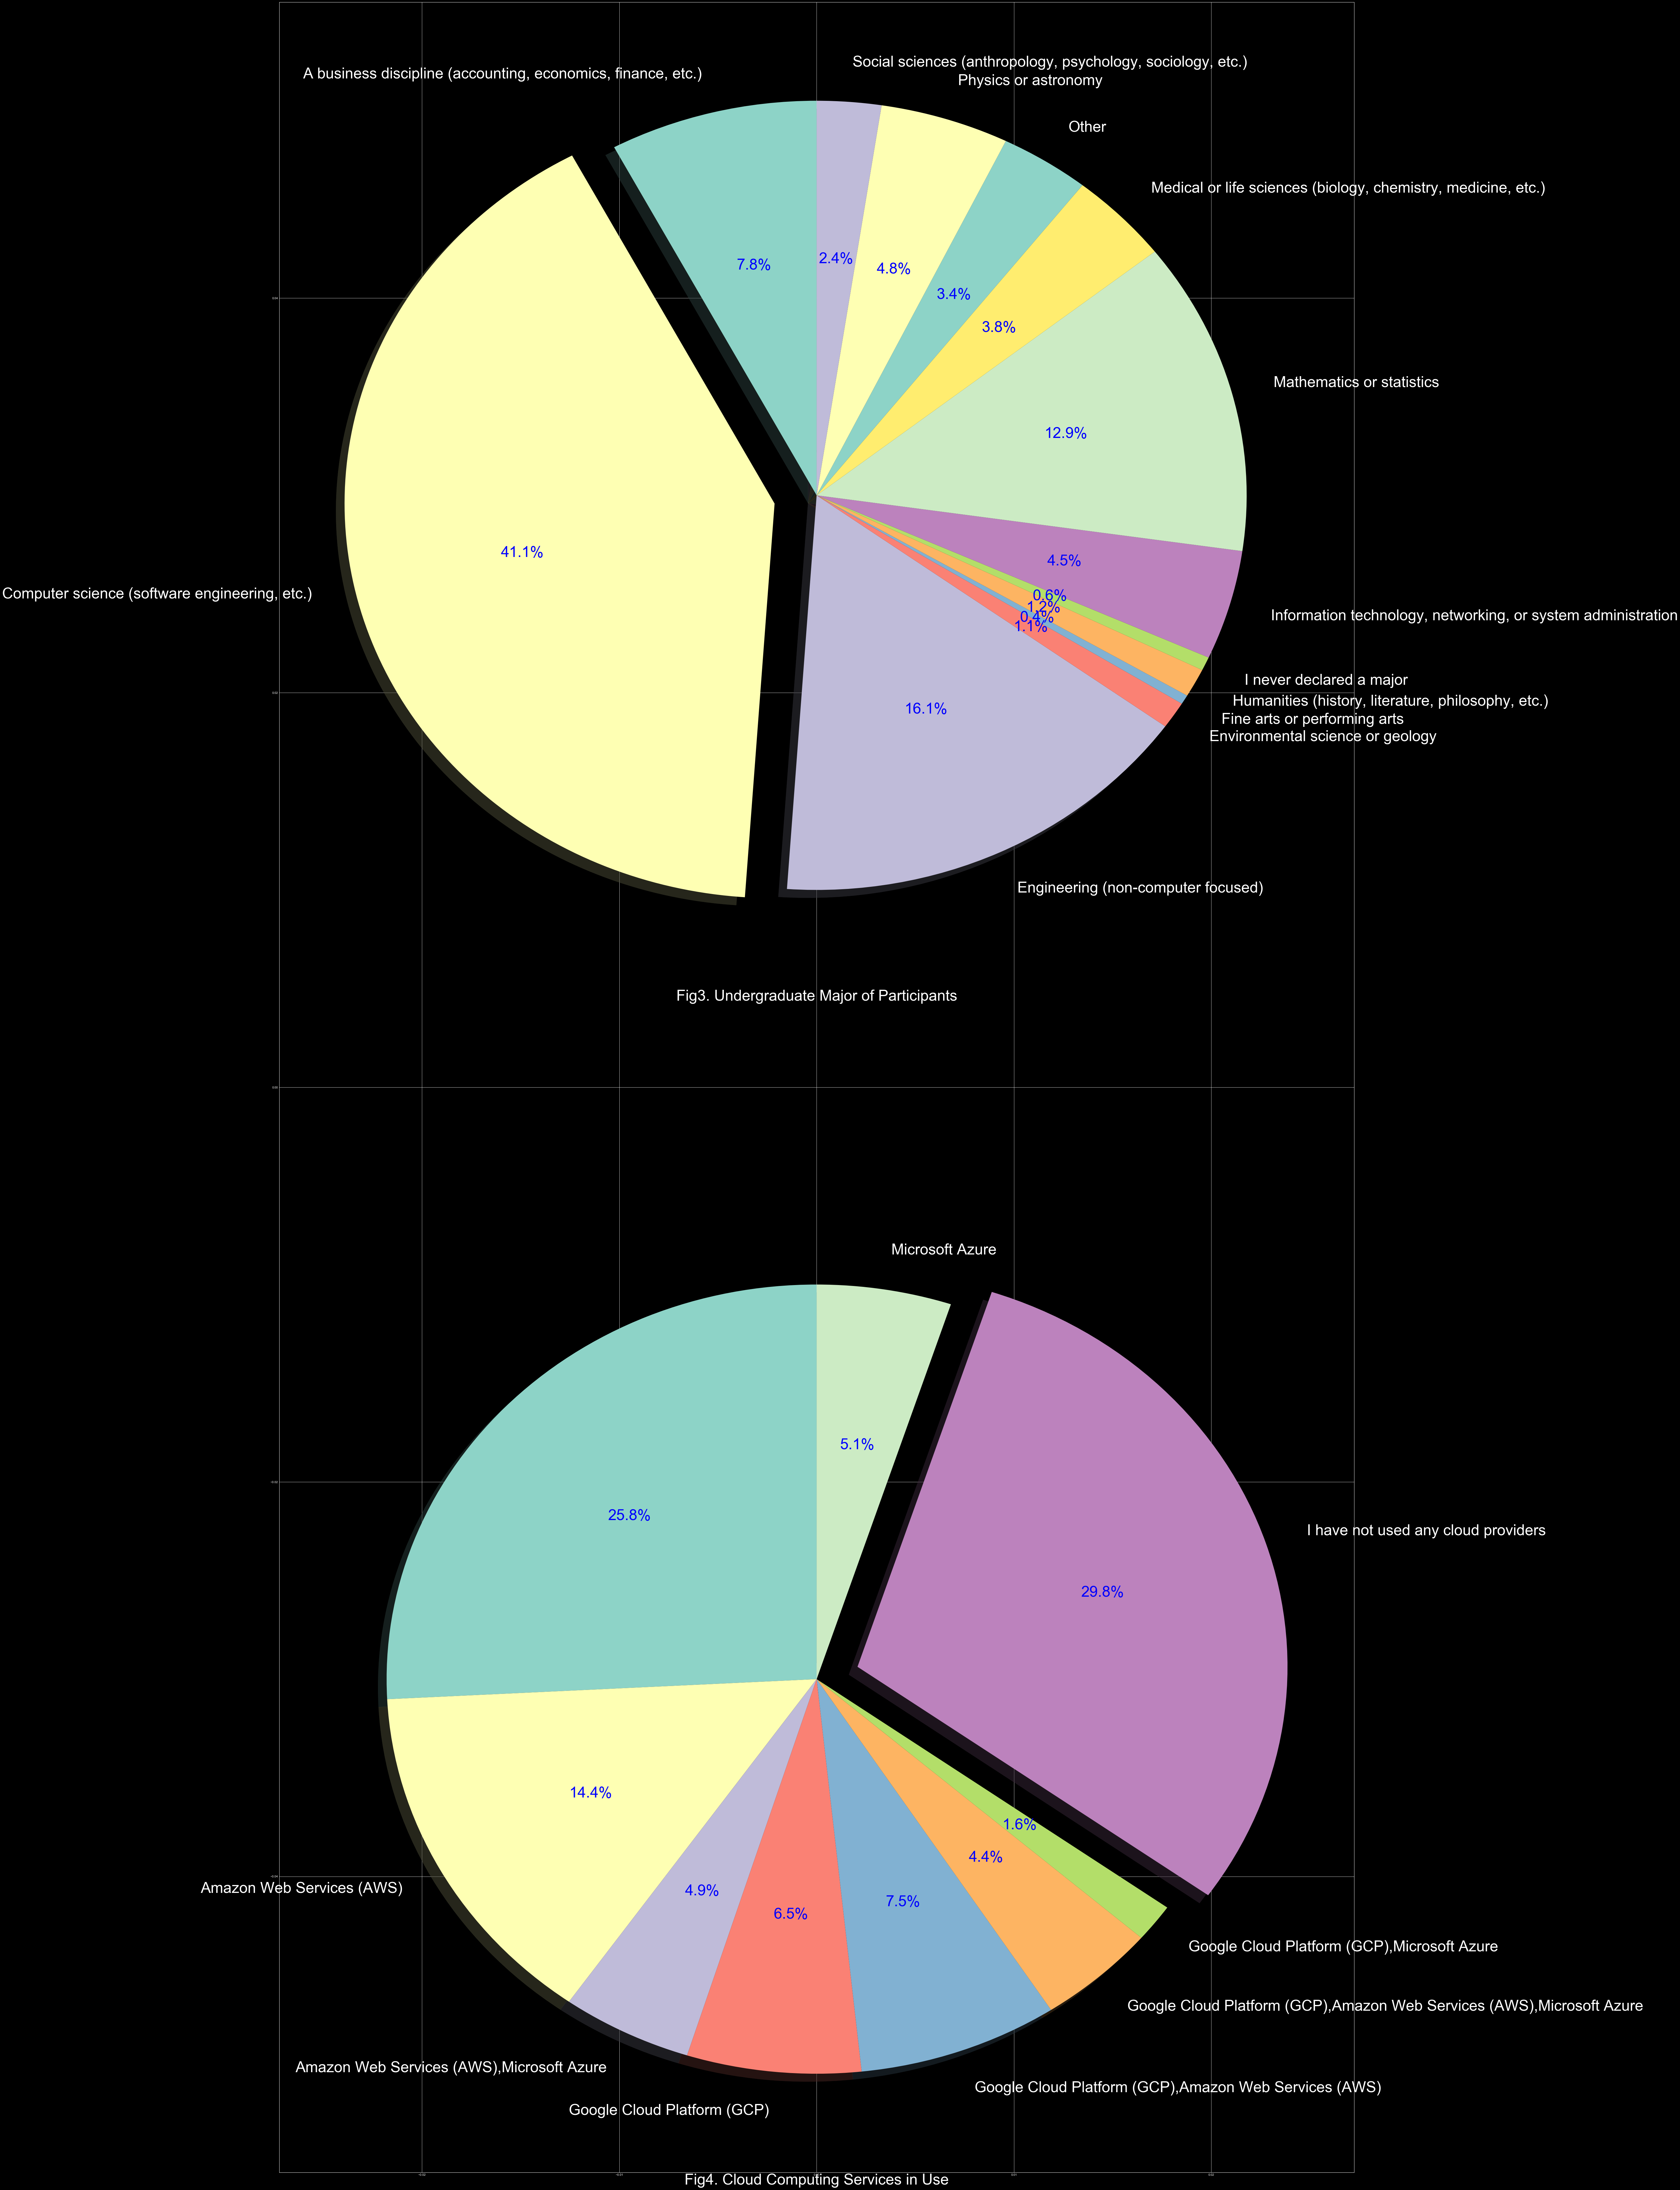

In [43]:

fig = plt.figure()
fig.set_size_inches(50, 100)
plt.axis('equal')
plt.tight_layout()

# First Subplot
labels1=Vis3["major"]
sizes1=Vis3["Number of People"]    
explode1 = [0] * labels1.size
explode1[sizes1.idxmax()]=0.1
ax1 = fig.add_subplot(211)
_, texts1,autotexts1 =ax1.pie(sizes1, explode=explode1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 50})
for autotext in autotexts1:
    autotext.set_color('blue')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.margins(0.2)
ax1.set_xlabel("Fig3. Undergraduate Major of Participants", fontsize=50)

# Second Subplot
labels2=Vis4["cloud computing services"]
sizes2=Vis4["Number of People"]
explode2= [0] * labels2.size
explode2[sizes2.idxmax()]=0.1
ax2 = fig.add_subplot(212)
_, texts2,autotexts2 =ax2.pie(sizes2, explode=explode2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 50})
for autotext in autotexts2:
    autotext.set_color('blue')
# Equal aspect ratio ensures that pie is drawn as a circle
ax2.margins(0.2)
ax2.set_xlabel("Fig4. Cloud Computing Services in Use", fontsize=50)



plt.show()


